Importing Shi Shi no cap

In [2]:
import warnings
from typing import Any, Dict, Optional, Tuple, Union
import matplotlib.pyplot as plt
import matplotlib.ticker as mpl_ticker
import numpy as np
import pandas as pd
import scipy as sp
import quantstats_lumi as qs
import databento as db

## PRICES OF JKHY AND PCG BY MINUTE

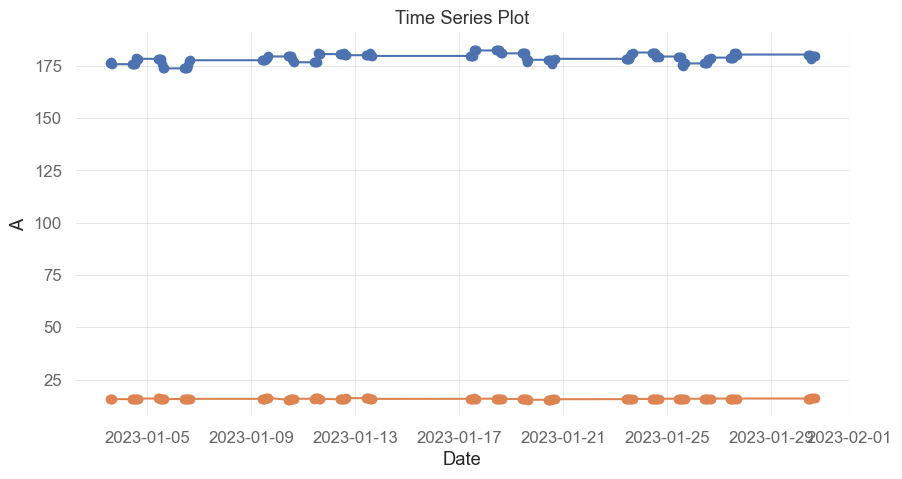

In [39]:
prices = pd.read_csv('data/stock/equity_table_singleday.csv')
# Extract the industrial classification, sector, and company names

prices['ts_event'] = pd.to_datetime(prices['ts_event'])

# Step 3: Set the ts_event column as the index
prices.set_index('ts_event', inplace=True)

prices.dropna(how='all', axis=1, inplace=True)
prices.dropna(subset=['JKHY'], inplace=True)


FIRST_MONTH_PATH = "./data/stock/xnas-itch-20230501-20230531.ohlcv-1m.dbn.zst"

# Read saved .dbn.zst
stored_data = db.DBNStore.from_file(FIRST_MONTH_PATH)

# Convert to dataframe
df = stored_data.to_df()
# df

train_prices = df.pivot_table(index='ts_event', columns='symbol', values='close', aggfunc='first')

fo_da_plot = train_prices #.reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(prices.index, prices['JKHY'], marker='o', linestyle='-')
plt.plot(prices.index, prices['PCG'], marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('A')
plt.grid(True)
plt.show()


In [47]:
train_eg = train_prices[["JKHY", "PCG"]].dropna()
train_eg

symbol,JKHY,PCG
ts_event,,
2023-05-01 13:29:00+00:00,162.59,17.270
2023-05-01 13:30:00+00:00,161.64,17.130
2023-05-01 13:31:00+00:00,161.07,17.210
2023-05-01 13:32:00+00:00,160.39,17.180
2023-05-01 13:33:00+00:00,160.55,17.190
...,...,...
2023-05-31 19:56:00+00:00,153.07,16.930
2023-05-31 19:57:00+00:00,153.00,16.940
2023-05-31 19:58:00+00:00,153.01,16.945


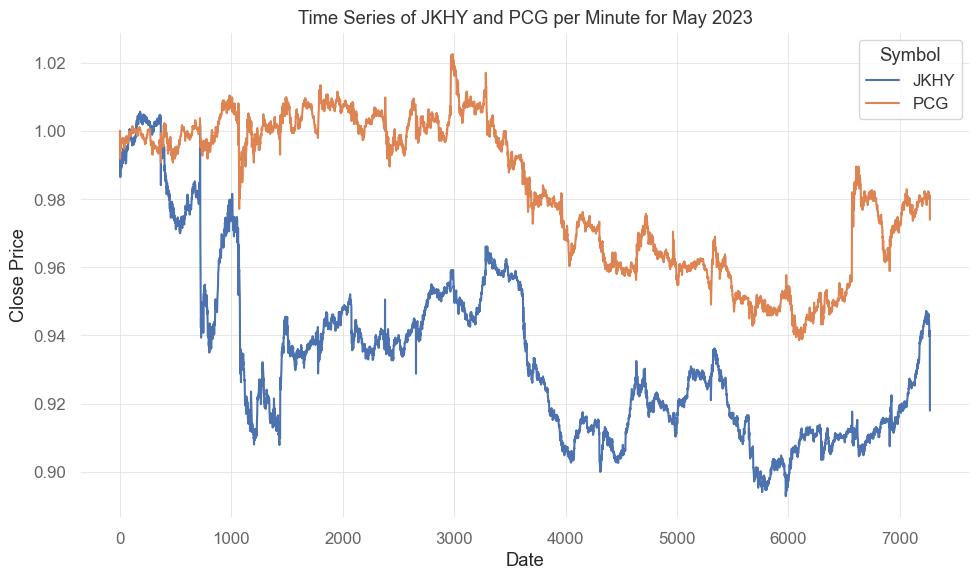

In [66]:
# selected_symbols = fo_da_plot[['JKHY', 'PCG']]
fo_da_plot = fo_da_plot.dropna()

fo_da_plot = fo_da_plot.reset_index(drop=True)

# Normalize prices
train_eg["JKHY"] = train_eg["JKHY"]/train_eg["JKHY"].iloc[0]
train_eg["PCG"] = train_eg["PCG"]/train_eg["PCG"].iloc[0]

fo_da_plot = train_eg.dropna()

fo_da_plot = fo_da_plot.reset_index(drop=True)

fo_da_plot.plot(figsize=(10, 6))
plt.title('JKHY and PCG Prices for May 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Symbol')

# HEy!!!

plt.show()
